# **`House Pricing Prediction Assignment`**

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

## Business Goal

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Steps/Phases per the CRISP-DM

CRISP-DM(Cross-Industry Standard Process for Data Mining) framework is a process model with six phases that naturally describes the data science life cycle. The phases mentioned are as below:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Modelling
5. Model Evaluation
6. Model Deployment (not in scope for this assignment)

### 1. Business Understanding


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.  


The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know:

+ Which ***variables*** are ***significant*** in predicting the price of a house, and

+ How ***well*** those ***variables*** ***describe*** the price of a house.

 

Also, determine the ***optimal value of lambda for ridge and lasso regression***.

### 2. Data Understanding

The dataset for the given problem statement is provided and we will be having a quick view of same next.

#### Importing required libraries

In [1]:
## Numpy and Pandas to contain and perform operations on data
import numpy as np # for mathematical operations
import pandas as pd # for reading and manipulation of data

## Matplotlib and Seaborn to visualize the data once we have cleaned up data
import matplotlib.pyplot as plt # for plotting charts and graphs
import seaborn as sns # for better charts and graphs (advanced graph library that uses matplotlib)

## Ignore the warnings
import warnings 
warnings.filterwarnings("ignore")
#warnings.simplefilter('always')

# Statsmodels for statistical analysis and building linear regression models
import statsmodels.api as sm

# scikit-learn libraries for statistical analysis and building linear regression models
from sklearn.model_selection import train_test_split # for spliting the dataset into train set and test set
from sklearn.preprocessing import MinMaxScaler # for rescalimg of variables
from sklearn.feature_selection import RFE # for using the Recursive Feature Selection method for feature selection
from sklearn.linear_model import LinearRegression # for using LinearRegression class to run RFE method
from sklearn.metrics import mean_squared_error # for checking the mean squared error
from sklearn.metrics import r2_score # for checking the r-squared
from statsmodels.stats.outliers_influence import variance_inflation_factor # for computing the VIF of the variables

# Ridge and Lasso for advance regression analysis
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

#### Loading Data

In [2]:
hp_df = pd.read_csv(filepath_or_buffer='train.csv')

In [3]:
hp_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print("We have " + '\033[1m' + str(hp_df.shape[0]) + ' rows\033[1m and ' + str(hp_df.shape[1]) + ' columns')

We have 1460 rows and 81 columns


#### Data Dictionary 

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


#### Checking Null values and Data Types

In [5]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Columns having null values

In [6]:
hp_df[hp_df.columns[hp_df.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [7]:
# Check values for object columns and compare them with data dictonary
# to verify if null value i.e. NaN is defined as category or not
for col,dtype in hp_df.dtypes[hp_df.isnull().any()].iteritems():
    if dtype == "object":
        print('\033[1m' + col + '\033[0m')
        print(hp_df[col].value_counts(dropna=False))
        print('')

Alley
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

BsmtQual
TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

BsmtCond
TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

BsmtExposure
No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

FireplaceQu
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

GarageType
Attchd     

In [8]:
hp_df.dtypes[hp_df.isnull().any()]

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [9]:
print(hp_df.columns[hp_df.isnull().any()])
print("We are having \033[1m{}\033[0m columns which have \033[1mnull\033[0m values".format(hp_df.columns[hp_df.isnull().any()].shape[0]))

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
We are having 19 columns which have null values


In [10]:
hp_df.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Id,1460.0,730.500000,421.610009,1.0,15.59,73.95,146.9,365.75,730.5,1095.25,1314.1,1387.05,1445.41,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,20.00,20.0,20.00,50.0,70.00,120.0,160.00,190.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,21.00,34.00,44.0,59.00,69.0,80.00,96.0,107.00,141.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,1680.00,3311.70,5000.0,7553.50,9478.5,11601.50,14381.7,17401.15,37567.64,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,3.00,4.00,5.0,5.00,6.0,7.00,8.0,8.00,10.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,3.00,4.00,5.0,5.00,5.0,6.00,7.0,8.00,9.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1899.18,1916.00,1924.9,1954.00,1973.0,2000.00,2006.0,2007.00,2009.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1950.00,1950.00,1950.0,1967.00,1994.0,2004.00,2006.0,2007.00,2009.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.00,0.0,0.00,0.0,166.00,335.0,456.00,791.92,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,0.00,0.0,0.00,383.5,712.25,1065.5,1274.00,1572.41,5644.0


#### Conclusion

##### Data Type Issues
Column ***MSSubClass*** is non-ordinal catgorical variable but loaded as numerical variable  
  
##### Null values analysis
On cross-referencing columns having null values with data dictionary we can say:
+ ***LotFrontage***: ***No explanation for NA***, NA ***could*** mean there is no connected road. 
+ ***Alley***: NA means	No alley access
+ ***MasVnrType***: ***No explanation for NA***, NA ***could*** mean there is no Masonry veneer, i.e. external additional wall
+ ***MasVnrArea***: ***No explanation for NA***, since no MasVnrType hence no area recorded
+ ***BsmtQual***: NA means no basement
+ ***BsmtCond***: NA means no basement
+ ***BsmtExposure***: NA means no basement
+ ***BsmtFinType1***: NA means no basement
+ ***BsmtFinType2***: NA means no basement
+ ***Electrical***: ***No explanation for NA***, Single record, could be excluded or imputed with Majority value
+ ***FireplaceQu***: NA means no Fireplace
+ ***GarageType***: NA means no Garage exists
+ ***GarageYrBlt***: NA means no Garage exists hence no year
+ ***GarageFinish***: NA means no Garage exists
+ ***GarageQual***: NA means no Garage exists
+ ***GarageCond***: NA means no Garage exists
+ ***PoolQC***: NA means no Pool exists
+ ***Fence***: NA means no Fence exists
+ ***MiscFeature***: NA means no misc features exist in said house

##### Ordinal variables
Listed variables are ordinal numeric variables and can be used as is
+ OverallQual
+ OverallCond
+ YearBuilt
+ YearRemodAdd
+ BsmtFullBath
+ BsmtHalfBath
+ FullBath
+ HalfBath
+ BedroomAbvGr	
+ KitchenAbvGr
+ TotRmsAbvGrd
+ Fireplaces
+ GarageYrBlt
+ GarageCars
+ YrSold
+ MoSold

Following categorical variables have ordinal nature of categories hence we need to treat them accordingly
+ ExterQual
+ BsmtQual
+ BsmtCond
+ BsmtExposure
+ BsmtFinType1
+ BsmtFinType2
+ HeatingQC
+ KitchenQual
+ GarageFinish
+ GarageQual
+ GarageCond
+ ExterCond
+ LotShape
+ FireplaceQu

##### Outlier candidates
By observing the above percentile values, the following columns need Outlier analysis
+ BsmtFinSF1

In [11]:
# having this functions to print row and columns count

def printColumnCount(dataframe):
    print("Now we are left with\033[1m {} columns\033[0m".format(str(dataframe.shape[1])))
    
def printRowCount(dataframe):
    print("Now we are left with\033[1m {} rows\033[0m".format(str(dataframe.shape[0])))

### 3. Data Preparation

We will now clean and structure data so we can use it for further analysis and model building.

Creating a **checkpoint dataframe** here

In [12]:
hp_df_clean = hp_df.copy()

#### Fixing Data Types

In [13]:
hp_df_clean['MSSubClass'] = hp_df_clean['MSSubClass'].apply(str)

#### Fixing Null Values

***LotFrontage(Linear feet of street connected to property)*** is imputed to be 0 for NA as it means no street connected to property

***MasVnrType*** already has None for absence of Masonry veneer but since thats also the value held by majority of rows hence imputing 8 NA rows to None and by that definition marking respective rows ***MasVnrArea*** as 0



In [14]:
hp_df_clean['LotFrontage'] = hp_df_clean['LotFrontage'].apply(lambda x: 0 if pd.isnull(x) else x)
hp_df_clean['Alley'] = hp_df_clean['Alley'].apply(lambda x: 'NA' if pd.isnull(x) else x)
hp_df_clean['MasVnrType'] = hp_df_clean['MasVnrType'].apply(lambda x: 'None' if pd.isnull(x) else x)
hp_df_clean['MasVnrArea'] = hp_df_clean['MasVnrArea'].apply(lambda x: 0. if pd.isnull(x) else x)
hp_df_clean['BsmtQual'] = hp_df_clean['BsmtQual'].apply(lambda x: 'NA' if pd.isnull(x) else x)
hp_df_clean['BsmtCond'] = hp_df_clean['BsmtCond'].apply(lambda x: 'NA' if pd.isnull(x) else x)
hp_df_clean['BsmtExposure'] = hp_df_clean['BsmtExposure'].apply(lambda x: 'NA' if pd.isnull(x) else x)
hp_df_clean['BsmtFinType1'] = hp_df_clean['BsmtFinType1'].apply(lambda x: 'NA' if pd.isnull(x) else x)
hp_df_clean['BsmtFinType2'] = hp_df_clean['BsmtFinType2'].apply(lambda x: 'NA' if pd.isnull(x) else x)
hp_df_clean['FireplaceQu'] = hp_df_clean['FireplaceQu'].apply(lambda x: 'NA' if pd.isnull(x) else x)
hp_df_clean['GarageType'] = hp_df_clean['GarageType'].apply(lambda x: 'NA' if pd.isnull(x) else x)
#hp_df_clean['GarageYrBlt'] = hp_df_clean['GarageYrBlt'].apply(lambda x: 'NA' if pd.isnull(x) else x)
hp_df_clean['GarageFinish'] = hp_df_clean['GarageFinish'].apply(lambda x: 'NA' if pd.isnull(x) else x)
hp_df_clean['GarageQual'] = hp_df_clean['GarageQual'].apply(lambda x: 'NA' if pd.isnull(x) else x)
hp_df_clean['GarageCond'] = hp_df_clean['GarageCond'].apply(lambda x: 'NA' if pd.isnull(x) else x)
hp_df_clean['PoolQC'] = hp_df_clean['PoolQC'].apply(lambda x: 'NA' if pd.isnull(x) else x)
hp_df_clean['Fence'] = hp_df_clean['Fence'].apply(lambda x: 'NA' if pd.isnull(x) else x)
hp_df_clean['MiscFeature'] = hp_df_clean['MiscFeature'].apply(lambda x: 'NA' if pd.isnull(x) else x)

In [15]:
hp_df_clean.GarageYrBlt.fillna(hp_df_clean.YrSold+1, inplace=True)

In [16]:
hp_df_clean[hp_df_clean.GarageYrBlt > hp_df_clean.YrSold]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,NA,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,122000
1407,1408,20,RL,0.0,8780,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,NA,0,3,2009,WD,Normal,112000
1449,1450,180,RM,21.0,1533,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.0,9000,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,9,2009,WD,Normal,136000


In [17]:
hp_df_clean[hp_df_clean.columns[hp_df_clean.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Electrical  1459 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


Now we are left with only one column having single row as null value, hence dropping

In [18]:
printRowCount(hp_df_clean)
printColumnCount(hp_df_clean)

Now we are left with 1460 rows
Now we are left with 81 columns


#### Dropping null rows

In [19]:
hp_df_clean = hp_df_clean.dropna()
printRowCount(hp_df_clean)
printColumnCount(hp_df_clean)

Now we are left with 1459 rows
Now we are left with 81 columns


#### Dropping redundant columns

In [20]:
hp_df_clean = hp_df_clean.drop(['Id'], axis=1)
printRowCount(hp_df_clean)
printColumnCount(hp_df_clean)

Now we are left with 1459 rows
Now we are left with 80 columns


#### Checking and dropping Duplicates

In [21]:
# drop any duplicate rows
hp_df_clean = hp_df_clean.drop_duplicates()
printRowCount(hp_df_clean)
printColumnCount(hp_df_clean)

Now we are left with 1459 rows
Now we are left with 80 columns


So no duplicates were found

#### Business logic check

In [22]:
hp_df_clean[hp_df_clean['YrSold'] < hp_df_clean['YearRemodAdd']]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NA,IR1,Bnk,AllPub,Inside,...,0,NA,NA,NA,0,10,2007,New,Partial,184750


Here we can see house remoded year(YearRemodAdd) was after sale(YrSold) which cannot be correct hence dropping this row

In [23]:
hp_df_clean.drop(523, axis=0, inplace=True)

In [24]:
printRowCount(hp_df_clean)
printColumnCount(hp_df_clean)

Now we are left with 1458 rows
Now we are left with 80 columns


#### Dervied mertics

Since years make sense in relative to when property is sold usaually hence deriving a better metric called age for all year columns

In [25]:
hp_df_clean['YearBuiltAge'] = hp_df_clean['YrSold'] - hp_df_clean['YearBuilt']
hp_df_clean['YearRemodAddAge'] = hp_df_clean['YrSold'] - hp_df_clean['YearRemodAdd']
hp_df_clean['GarageYrBltAge'] = hp_df_clean['YrSold'] - hp_df_clean['GarageYrBlt']

In [26]:
hp_df_clean = hp_df_clean.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis=1)

In [27]:
printRowCount(hp_df_clean)
printColumnCount(hp_df_clean)

Now we are left with 1458 rows
Now we are left with 79 columns


#### Treating ordinal categorical variables

In [28]:
cat_ordinal = ['ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 
                'GarageFinish', 'GarageQual', 'GarageCond', 'ExterCond', 'LotShape', 'FireplaceQu']

cat_ordinal_replace_dict = { 
    'ExterQual' : {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'BsmtQual' : {'NA': 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'BsmtCond' : {'NA': 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'BsmtExposure' : {'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
    'BsmtFinType1' : {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'BsmtFinType2' : {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'HeatingQC' : {'NA': 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'KitchenQual' : {'Po': 0, 'Fa': 1, 'TA': 2,'Gd': 3, 'Ex': 4},
    'GarageFinish' : {'NA':0, 'Unf': 1, 'RFn': 2, 'Fin':3},
    'GarageQual' : {'NA': 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'GarageCond' : {'NA': 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'ExterCond' : {'Po': 0, 'Fa': 1, 'TA': 2,'Gd': 3, 'Ex': 4},
    'LotShape' : {'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3},
    'FireplaceQu' : {'NA': 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
}

# Replacing categories with numbers
for i in cat_ordinal:
    hp_df_clean['{}'.format(i)] = hp_df_clean['{}'.format(i)].replace(cat_ordinal_replace_dict[i])

In [29]:
printRowCount(hp_df_clean)
printColumnCount(hp_df_clean)

Now we are left with 1458 rows
Now we are left with 79 columns


#### Outlier Treatment

##### BsmtFinSF1

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff50822f700>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff4fa478220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff50822fe20>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff4fa478be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff4fa478fa0>],
 'means': []}

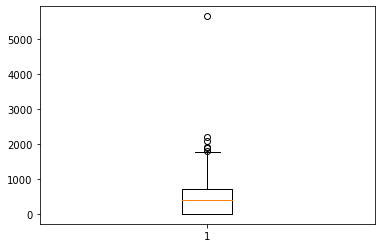

In [30]:
plt.boxplot(hp_df_clean['BsmtFinSF1'])

We can observe outliers in box plot above and will be treating it

In [31]:
Quartile1 = hp_df_clean['BsmtFinSF1'].quantile(0.1)
Quartile3 = hp_df_clean['BsmtFinSF1'].quantile(0.9)
IQR = Quartile3 - Quartile1
hp_df_clean = hp_df_clean[(hp_df_clean['BsmtFinSF1'] >= Quartile1 - 1.5*IQR) & 
                      (hp_df_clean['BsmtFinSF1'] <= Quartile3 + 1.5*IQR)]
printRowCount(hp_df_clean)
printColumnCount(hp_df_clean)

Now we are left with 1457 rows
Now we are left with 79 columns


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff4fa5d6b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff508245280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff4fa5d6790>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff5082459a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff508245d30>],
 'means': []}

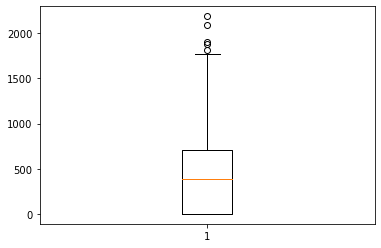

In [32]:
plt.boxplot(hp_df_clean['BsmtFinSF1'])

#### Target Variable Skweness Check

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

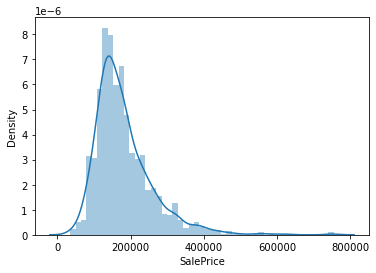

In [33]:
sns.distplot(hp_df_clean["SalePrice"])

We can observe right skewness. We will try to take a log and observe.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

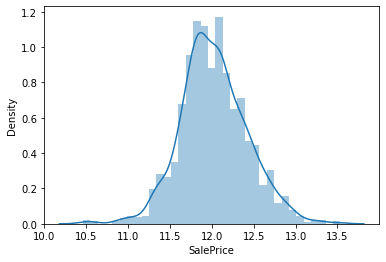

In [34]:
sns.distplot(np.log(hp_df_clean["SalePrice"]))

In [35]:
hp_df_clean["SalePrice"] = np.log(hp_df_clean["SalePrice"])

#### Checking for linear relationship among suspected columns

In [36]:
def linearity_analysis_column(X, y):
    sns.regplot(x=X, y=y)
    plt.title(y.name + ' v/s '+ X.name)
    plt.xlabel(X.name)
    plt.ylabel(y.name)
    plt.show()

##### LotArea

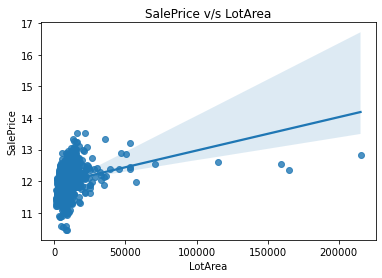

In [37]:
linearity_analysis_column(hp_df_clean['LotArea'],hp_df_clean['SalePrice'])

As we can observe ***LotArea*** does have a linear relation ship with target variable.

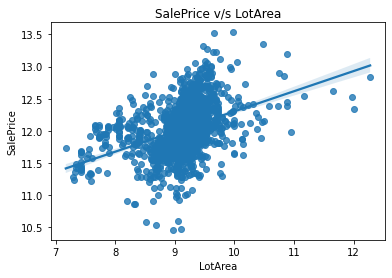

In [38]:
linearity_analysis_column(np.log(hp_df_clean['LotArea']),hp_df_clean['SalePrice'])

In [39]:
hp_df_clean['LotArea'] = np.log(hp_df_clean['LotArea'])

##### BsmtFinSF1

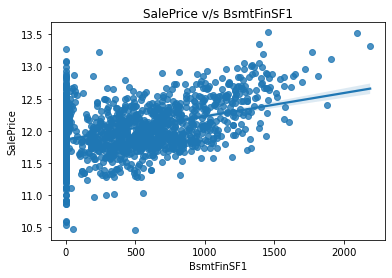

In [40]:
linearity_analysis_column(hp_df_clean['BsmtFinSF1'],hp_df_clean['SalePrice'])

As we can observe ***BsmtFinSF1*** does have a linear relation ship with target variable.

#### Creating dummy variables for categorical variables

In [41]:
# subset all categorical variables
hp_df_clean_cat = hp_df_clean.select_dtypes(include=['object'])
hp_df_clean_cat.head()

,MSSubClass,MSZoning,Street,Alley,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,CentralAir,Electrical,Functional,GarageType,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NA,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Y,SBrkr,Typ,Attchd,Y,NA,NA,NA,WD,Normal
1,20,RL,Pave,NA,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Y,SBrkr,Typ,Attchd,Y,NA,NA,NA,WD,Normal
2,60,RL,Pave,NA,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Y,SBrkr,Typ,Attchd,Y,NA,NA,NA,WD,Normal
3,70,RL,Pave,NA,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Y,SBrkr,Typ,Detchd,Y,NA,NA,NA,WD,Abnorml
4,60,RL,Pave,NA,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Y,SBrkr,Typ,Attchd,Y,NA,NA,NA,WD,Normal


In [42]:
hp_df_clean_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [43]:
# convert into dummies - one hot encoding
hp_df_clean_dummies = pd.get_dummies(hp_df_clean_cat, drop_first=True)
hp_df_clean_dummies.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [44]:
# drop categorical variables 
hp_df_clean = hp_df_clean.drop(list(hp_df_clean_cat.columns), axis=1)

In [45]:
# concat dummy variables with hp_df_clean
hp_df_clean = pd.concat([hp_df_clean, hp_df_clean_dummies], axis=1)

In [46]:
printRowCount(hp_df_clean)
printColumnCount(hp_df_clean)

Now we are left with 1457 rows
Now we are left with 226 columns


#### Test-Train Data Split

In [47]:
# split into train and test
train, test = train_test_split(hp_df_clean, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Scaling Data

In [48]:
# Creating scaler using training data only
scaler = MinMaxScaler()
cols_to_scale = train.columns.difference(hp_df_clean_dummies.columns)
train[cols_to_scale] = scaler.fit_transform(train[cols_to_scale])

In [49]:
train.describe()

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1019.000000,1019.000000,1019.00000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,...,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,0.186332,0.378382,0.65489,0.566678,0.569799,0.065797,0.468106,0.361465,0.701472,0.734298,...,0.002944,0.003925,0.088322,0.002944,0.864573,0.003925,0.006869,0.015702,0.822375,0.089303
std,0.108736,0.103257,0.46707,0.154245,0.135447,0.113322,0.193041,0.115745,0.176263,0.136162,...,0.054206,0.062561,0.283902,0.054206,0.342347,0.062561,0.082638,0.124380,0.382385,0.285321
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.137380,0.341140,0.00000,0.444444,0.500000,0.000000,0.333333,0.333333,0.600000,0.750000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.201278,0.387196,1.00000,0.555556,0.500000,0.000000,0.333333,0.333333,0.800000,0.750000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.252396,0.426081,1.00000,0.666667,0.625000,0.103750,0.666667,0.333333,0.800000,0.750000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Conclusion

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 342 to 793
Columns: 226 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(49), uint8(177)
memory usage: 574.2 KB


In [51]:
printRowCount(hp_df_clean)
printColumnCount(hp_df_clean)

Now we are left with 1457 rows
Now we are left with 226 columns


### 4. Model Building

As we have ***1457 rows and 225 dependent variables***. We will be performing following to observe how model can become complex and how using regularization we can further make it a simpler, robust and generalisable one.

+ Linear Regression
+ Linear Regression with RFE
+ Ridge Regression
+ Ridge Regression with RFE
+ Lasso Regression

#### Target Varaible Split and Test Scaling

In [52]:
y_train = train['SalePrice']
X_train = train.drop('SalePrice', axis=1)

test[cols_to_scale] = scaler.transform(test[cols_to_scale])

y_test = test['SalePrice']
X_test = test.drop('SalePrice', axis=1)

Creating a **checkpoint dataframe** here

In [53]:
X_train_lm = X_train.copy()

In [54]:
# Functions for re-use

# as we will be building model after feature elimination hence making a function for same
def buildLRModel(X_train, y_train):
    X_train_lrm = sm.add_constant(X_train)  # adding a constant to the provided set
    lr_model = sm.OLS(y_train, X_train_lrm).fit()    # Fitting the OLS for X_train_lrm & y_train to get model
    print(lr_model.summary())
    return lr_model

# since we will need VIF to cross-reference our models results 
# creating a function for reuse
def calculateVIF(dataframe):
    vif = pd.DataFrame()                    # declaring the variable vif as a dataframe
    vif['Features'] = dataframe.columns     # adding columns names so we can see which VIF value corresponds to what feature
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]   # calculated VIF is added to a new column called VIF
    vif['VIF'] = round(vif['VIF'], 2)                        # rounding off values to 2nd decimal 
    vif = vif.sort_values(by = "VIF", ascending = False)     # sorting such that highest VIF is on top
    print(vif)

# Prints model evaulation metrics R2, RSS and MSE
# both for test and training sets
def calculateMetrics(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print('R2 of train = {}'.format(r2_train_lr))
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    print('R2 of test = {}'.format(r2_test_lr))
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print('RSS of train = {}'.format(rss1_lr))
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print('RSS of test = {}'.format(rss2_lr))
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print('MSE of train = {}'.format(mse_train_lr))
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print('MSE of test = {}'.format(mse_test_lr))
    metric.append(mse_test_lr**0.5)
    return metric

# Performs bi-variate analysis for all independent variables v/s dependent variable
def linearity_analysis(X, y):
    plot_df = X.copy()
    plot_df['SalePrice'] = y
    
    for i in range(0, len(X.columns.to_list()), 6):
        g = sns.pairplot(data=plot_df, x_vars=X.columns.tolist()[i:i+6], y_vars='SalePrice', kind='reg')
        if i == 0:
            g.fig.suptitle('Linearity of dependent variables')
    plt.show()

# Performs residual analysis for checking linear regression assumptions
def residuals_analysis(y_train, y_train_pred):    
    residuals = y_train-y_train_pred
    
    sns.histplot(residuals, kde=True)
    plt.title('Normality of Residuals(error terms)')
    plt.xlabel('Residuals')
    plt.show()
    
    plt.scatter(y_train_pred , residuals)
    plt.axhline(y=0, color='r', linestyle=':')
    plt.title('Predicted Sale Price v/s Residuals(error terms)')
    plt.xlabel("Predicted Sale Price")
    plt.ylabel("Residual")
    plt.show()
    
    sns.regplot(x=y_train, y=y_train_pred)
    plt.title('Predicted Sale Price v/s Actual Sale Price')
    plt.xlabel('Actual Sale Price')
    plt.ylabel('Predicted Sale Price')
    plt.show()
    
    sns.scatterplot(x=y_train, y=residuals)
    plt.title('Actual Sale Price v/s Residuals(error terms)')
    plt.ylabel('Residuals')
    plt.xlabel('Actual Sale Price')
    plt.show()
    
    sns.scatterplot(x=y_train.index, y=residuals)
    plt.title('Residuals(error terms) v/s observation order')
    plt.ylabel('Residual')
    plt.xlabel('Observation order')
    plt.show()

#### Linear Regression

Building a Linear regression model without any feature elimination to observe how complexity gets built into a model

In [55]:
lrm_0 = buildLRModel(X_train_lm,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     79.69
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        20:30:32   Log-Likelihood:                 2201.2
No. Observations:                1019   AIC:                            -3972.
Df Residuals:                     804   BIC:                            -2913.
Df Model:                         214                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.19

##### Evaluating model

In [56]:
metrics_lr = calculateMetrics(lrm_0,sm.add_constant(X_train_lm),y_train,sm.add_constant(X_test,has_constant='add'),y_test)

R2 of train = 0.9549778598662879
R2 of test = 0.8856761226337625
RSS of train = 0.7932899128113577
RSS of test = 0.8015144999706574
MSE of train = 0.0007784984424056504
MSE of test = 0.0018299417807549256


We can observe that although the model R2 is very high on test set but it falls on test set indicating that model has learnt too much of train set and on unseen data its missing more.

#### Linear Regression with RFE

In [57]:
# Fitting a LinearRegression model from sklearn package for RFE
lin_reg = LinearRegression()
lin_reg.fit(X_train_lm,y_train)

LinearRegression()

In [58]:
rfe = RFE(estimator=lin_reg, n_features_to_select=20)
rfe.fit(X_train_lm,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [59]:
# Displaying the feature ranks
sorted(list(zip(X_train_lm.columns,rfe.support_, rfe.ranking_)), key= lambda x: x[2])

[('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('BsmtFinSF1', True, 1),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('GarageCars', True, 1),
 ('YearBuiltAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Exterior1st_BrkComm', True, 1),
 ('Foundation_Wood', True, 1),
 ('Heating_GasW', True, 1),
 ('Heating_Wall', True, 1),
 ('Functional_Sev', True, 1),
 ('SaleType_ConLD', True, 1),
 ('SaleType_New', True, 1),
 ('SaleCondition_Partial', True, 1),
 ('Heating_GasA', False, 2),
 ('PoolQC_Gd', False, 3),
 ('PoolQC_NA', False, 4),
 ('PoolQC_Fa', False, 5),
 ('MiscFeature_NA', False, 6),
 ('MiscFeature_Shed', False, 7),
 ('MiscVal', False, 8),
 ('MSSubClass_40', False, 9),
 ('RoofMatl_WdShake', False, 10),
 ('RoofStyle_Mansard', False, 11),
 ('Neighborhood_Crawfor', False, 12),
 ('SaleType_Con', False, 13),
 ('Condition2_PosN', False, 14),
 ('Exterior2nd_Stucco', False, 15),
 ('Ex

In [60]:
print("Columns selected by RFE",X_train.columns[rfe.support_])
print("Columns eliminated by RFE",X_train.columns[~rfe.support_])

Columns selected by RFE Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       'GrLivArea', 'GarageCars', 'YearBuiltAge', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Exterior1st_BrkComm', 'Foundation_Wood',
       'Heating_GasW', 'Heating_Wall', 'Functional_Sev', 'SaleType_ConLD',
       'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')
Columns eliminated by RFE Index(['LotFrontage', 'LotShape', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=205)


In [61]:
# Creating the train dataset for manual feature selection by keeping only the automatically selected features
X_train_rfe_1 = X_train_lm[X_train_lm.columns[rfe.support_]]

In [62]:
lrm_1 = buildLRModel(X_train_rfe_1,y_train)
calculateVIF(X_train_rfe_1)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     547.2
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        20:30:35   Log-Likelihood:                 1886.0
No. Observations:                1019   AIC:                            -3730.
Df Residuals:                     998   BIC:                            -3627.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

In [63]:
X_train_rfe_2 = X_train_rfe_1.drop(['Heating_GasW'], axis=1)
lrm_2 = buildLRModel(X_train_rfe_2,y_train)
calculateVIF(X_train_rfe_2)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     576.0
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        20:30:35   Log-Likelihood:                 1885.6
No. Observations:                1019   AIC:                            -3731.
Df Residuals:                     999   BIC:                            -3633.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

In [64]:
X_train_rfe_3 = X_train_rfe_2.drop(['Heating_Wall'], axis=1)
lrm_3 = buildLRModel(X_train_rfe_3,y_train)
calculateVIF(X_train_rfe_3)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     608.0
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        20:30:35   Log-Likelihood:                 1885.1
No. Observations:                1019   AIC:                            -3732.
Df Residuals:                    1000   BIC:                            -3639.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

In [65]:
X_train_rfe_4 = X_train_rfe_3.drop(['SaleType_New'], axis=1)
lrm_4 = buildLRModel(X_train_rfe_4,y_train)
calculateVIF(X_train_rfe_4)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     635.1
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        20:30:35   Log-Likelihood:                 1878.3
No. Observations:                1019   AIC:                            -3721.
Df Residuals:                    1001   BIC:                            -3632.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

In [66]:
X_train_rfe_5 = X_train_rfe_4.drop(['OverallQual'], axis=1)
lrm_5 = buildLRModel(X_train_rfe_5,y_train)
calculateVIF(X_train_rfe_5)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     505.9
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        20:30:35   Log-Likelihood:                 1745.3
No. Observations:                1019   AIC:                            -3457.
Df Residuals:                    1002   BIC:                            -3373.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [67]:
X_train_rfe_6 = X_train_rfe_5.drop(['MSZoning_RL'], axis=1)
lrm_6 = buildLRModel(X_train_rfe_6,y_train)
calculateVIF(X_train_rfe_6)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     499.1
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        20:30:35   Log-Likelihood:                 1709.6
No. Observations:                1019   AIC:                            -3387.
Df Residuals:                    1003   BIC:                            -3308.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

In [68]:
X_train_rfe_7 = X_train_rfe_6.drop(['SaleType_ConLD'], axis=1)
lrm_7 = buildLRModel(X_train_rfe_7,y_train)
calculateVIF(X_train_rfe_7)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     535.1
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        20:30:35   Log-Likelihood:                 1709.5
No. Observations:                1019   AIC:                            -3389.
Df Residuals:                    1004   BIC:                            -3315.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

In [69]:
X_train_rfe_8 = X_train_rfe_7.drop(['MSZoning_RM'], axis=1)
lrm_8 = buildLRModel(X_train_rfe_8,y_train)
calculateVIF(X_train_rfe_8)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     575.4
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        20:30:35   Log-Likelihood:                 1708.3
No. Observations:                1019   AIC:                            -3389.
Df Residuals:                    1005   BIC:                            -3320.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

In [70]:
X_train_rfe_9 = X_train_rfe_8.drop(['MSZoning_RH'], axis=1)
lrm_9 = buildLRModel(X_train_rfe_9,y_train)
calculateVIF(X_train_rfe_9)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     622.6
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        20:30:35   Log-Likelihood:                 1707.4
No. Observations:                1019   AIC:                            -3389.
Df Residuals:                    1006   BIC:                            -3325.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

In [71]:
X_train_rfe_10 = X_train_rfe_9.drop(['LotArea'], axis=1)
lrm_10 = buildLRModel(X_train_rfe_10,y_train)
calculateVIF(X_train_rfe_10)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     617.2
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        20:30:36   Log-Likelihood:                 1664.2
No. Observations:                1019   AIC:                            -3304.
Df Residuals:                    1007   BIC:                            -3245.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

In [72]:
X_train_rfe_11 = X_train_rfe_10.drop(['Foundation_Wood'], axis=1)
lrm_11 = buildLRModel(X_train_rfe_11,y_train)
calculateVIF(X_train_rfe_11)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     676.8
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        20:30:36   Log-Likelihood:                 1662.4
No. Observations:                1019   AIC:                            -3303.
Df Residuals:                    1008   BIC:                            -3249.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

##### Evaluating model

In [73]:
metrics_lr_rfe25_1 = calculateMetrics(lrm_1,sm.add_constant(X_train_rfe_1),y_train,sm.add_constant(X_test[X_train_rfe_1.columns],has_constant='add'),y_test)

R2 of train = 0.9164311142193302
R2 of test = 0.8843253844092875
RSS of train = 1.4724834030057443
RSS of test = 0.810984405099164
MSE of train = 0.0014450278734109364
MSE of test = 0.0018515625687195525


In [74]:
metrics_lr_rfe25_6 = calculateMetrics(lrm_6,sm.add_constant(X_train_rfe_6),y_train,sm.add_constant(X_test[X_train_rfe_6.columns],has_constant='add'),y_test)

R2 of train = 0.8818550477497908
R2 of test = 0.8492055862751218
RSS of train = 2.081713543410425
RSS of test = 1.0572061751183934
MSE of train = 0.0020428984724341756
MSE of test = 0.002413712728580807


In [75]:
metrics_lr_rfe25_11 = calculateMetrics(lrm_11,sm.add_constant(X_train_rfe_11),y_train,sm.add_constant(X_test[X_train_rfe_11.columns],has_constant='add'),y_test)

R2 of train = 0.8703703956935809
R2 of test = 0.8453764751436436
RSS of train = 2.2840730625554886
RSS of test = 1.0840517314849514
MSE of train = 0.002241484850397928
MSE of test = 0.0024750039531619894


We can see as and when we start reducing features the R2 for train goes down but now the test and train does not have less difference in R2 meaning it will perform better on unseen data set that simple LR model.

##### Checking for Linear Regression Assumption Voilations

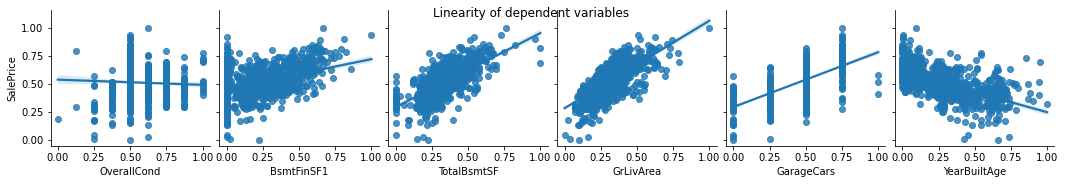

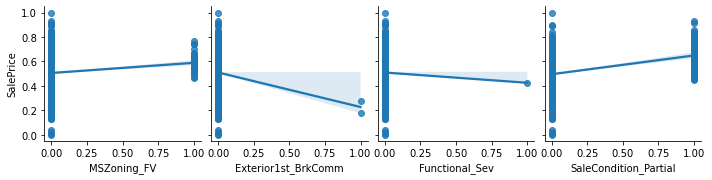

In [76]:
linearity_analysis(X_train_rfe_11,y_train)

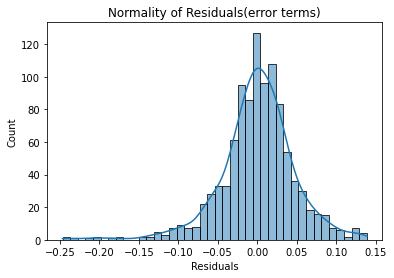

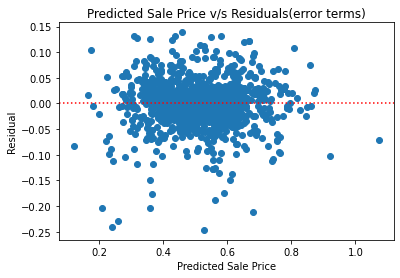

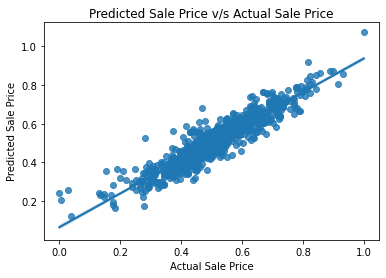

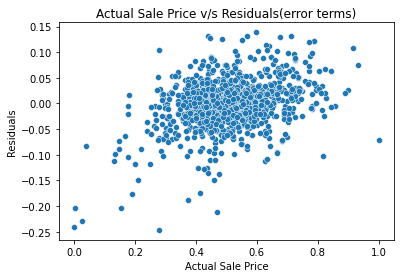

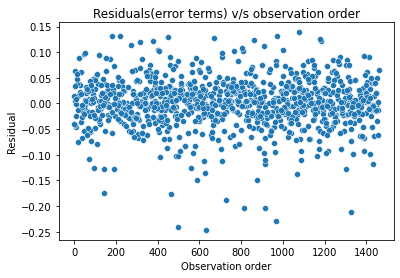

In [77]:
residuals_analysis(y_train, lrm_11.predict(sm.add_constant(X_train_rfe_11)))

No voilations visible

#### Ridge Regression

In [78]:
# Generates grid search model with cross validation 
def grid_model(estimator, X_train, y_train, folds = 5, scoring='neg_mean_absolute_error'):
    params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
     0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
     4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

    # model with cross validation
    model_cv = GridSearchCV(estimator = estimator, 
                            param_grid = params, 
                            scoring = scoring,  
                            cv = folds, 
                            return_train_score=True,
                            verbose = 1)            
    model_cv.fit(X_train, y_train) 
    return model_cv

In [79]:
# Generating Ridge Grid Search model
grid_ridge = grid_model(Ridge(), X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [80]:
# Printing the optimal hyperparameter 'alpha'
print(grid_ridge.best_params_)

{'alpha': 1.0}


In [81]:
# Fitting Ridge model for optimal alpha and printing coefficients
ridge_model = Ridge(alpha=grid_ridge.best_params_['alpha'])

ridge_model.fit(X_train, y_train)
print(ridge_model.coef_)

[ 1.04803256e-02  1.18207704e-01  2.21376250e-03  1.19923723e-01
  9.00658389e-02  1.70275616e-02  6.87792842e-03 -2.58940953e-02
  1.02985078e-02  5.52233263e-03  1.44723051e-02  1.01896198e-02
  5.60144085e-02 -7.66528403e-03  3.53610401e-02  1.60781303e-02
  6.62009392e-02  1.59032645e-02  1.13760247e-01  6.61396322e-02
  1.89701425e-03  1.14015724e-01  1.33683987e-02  6.80064052e-04
  1.69600232e-02  1.74970786e-02 -4.96769786e-03 -6.54570471e-03
  1.63243002e-02  3.18307602e-02  9.83687748e-03  9.96966452e-03
  5.68420569e-03  3.22298845e-02  4.22909626e-02  2.54512341e-02
  1.13195885e-03  2.00057881e-02  2.55892071e-02  1.51122814e-02
  2.35846282e-02  2.71520114e-02  9.54207425e-03  8.23284428e-03
 -1.53432584e-03 -7.92797215e-02 -1.35465688e-02  8.61982186e-03
 -7.33339529e-03  8.03489904e-04 -7.38418263e-03  1.75019853e-03
 -1.81059073e-02  1.77724403e-02  1.01297042e-02  3.90496843e-03
  5.18696378e-03  1.87675887e-02  6.44982350e-03 -6.07181408e-03
 -4.00135160e-03 -2.22474

##### Checking for Linear Regression Assumption Voilations

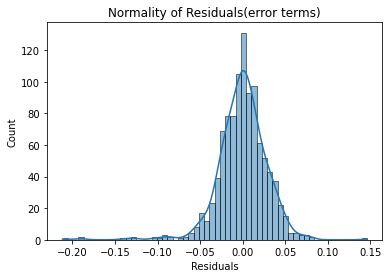

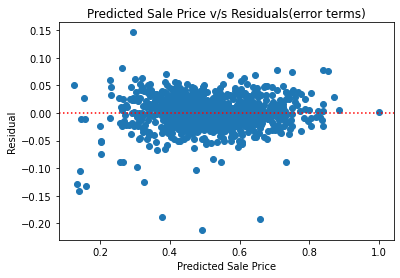

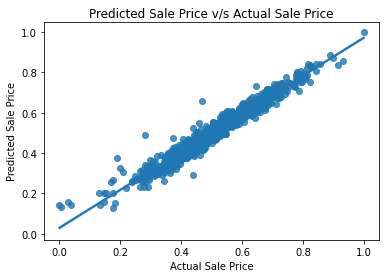

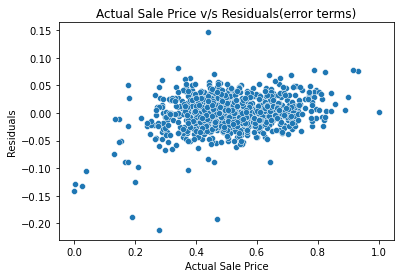

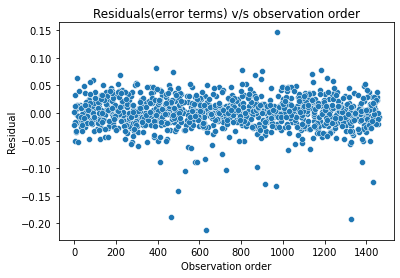

In [82]:
residuals_analysis(y_train, ridge_model.predict(X_train))

##### Evaluating model

In [83]:
metrics_ridge = calculateMetrics(ridge_model,X_train,y_train,X_test,y_test)

R2 of train = 0.9509648397166721
R2 of test = 0.9052772986289798
RSS of train = 0.8639993103465328
RSS of test = 0.6640924046168206
MSE of train = 0.0008478894115275101
MSE of test = 0.0015161927046046133


In [84]:
rfe = RFE(estimator=lin_reg, n_features_to_select=100)
rfe.fit(X_train_lm,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=100)

In [85]:
X_train_rfe_ridge = X_train_lm[X_train_lm.columns[rfe.support_]]

In [86]:
grid_ridge_rfe = grid_model(Ridge(), X_train_rfe_ridge, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [87]:
# Printing the best hyperparameter alpha
print(grid_ridge_rfe.best_params_)

{'alpha': 0.9}


In [88]:
#Fitting Ridge model for best alpha and printing coefficients which have been penalised
ridge_model_rfe = Ridge(alpha=grid_ridge_rfe.best_params_['alpha'])

ridge_model_rfe.fit(X_train_rfe_ridge, y_train)
print(ridge_model_rfe.coef_)

[ 0.14242159  0.16014414  0.10158755 -0.01596056  0.02767016  0.07902902
  0.03320952  0.00984434  0.07637639  0.02785567  0.14740457  0.09611441
  0.01311747  0.15400737  0.02974415  0.05018268  0.03037752  0.03145243
  0.01715962  0.03320752  0.00964634  0.02023569 -0.1212392   0.01949156
  0.01324983 -0.00817957  0.10749626  0.04032138  0.08930032  0.07807514
  0.          0.0132791   0.02275577  0.02409862  0.05117127 -0.02016215
  0.01901335  0.02456074  0.0159997   0.02360628  0.02252423  0.01919737
  0.01731206  0.01898191 -0.00894682  0.03989546 -0.03178194  0.
  0.          0.0063396  -0.00817957 -0.01123838  0.00698578  0.0142288
  0.03873474  0.00031797 -0.01957625  0.02330876 -0.00509256 -0.04636541
  0.02822382  0.00035593  0.01480298  0.01443541  0.02426101 -0.00509256
  0.00517099  0.00035593 -0.00917037 -0.01012158 -0.01472467 -0.0237544
 -0.04455711  0.03980802  0.04869108  0.00561506  0.05386613  0.
 -0.0240703   0.02995802  0.03649449 -0.01097448 -0.04869907  0.04013

##### Checking for Linear Regression Assumption Voilations

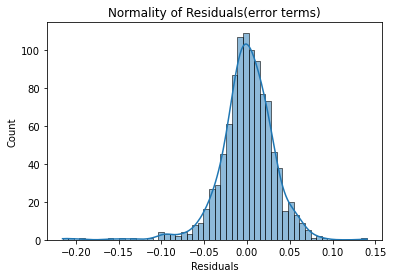

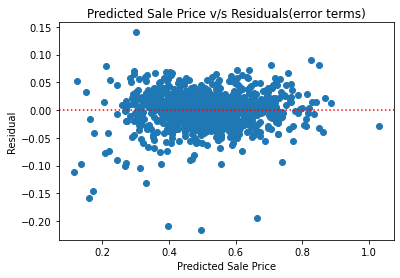

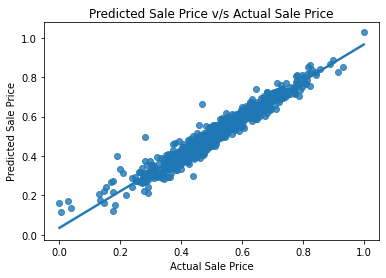

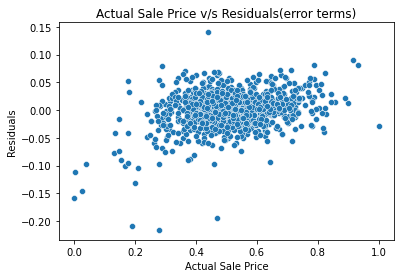

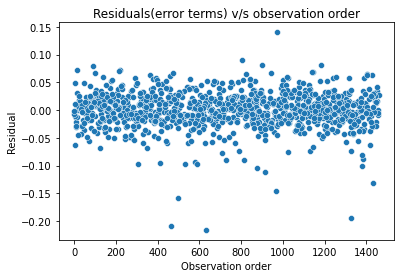

In [89]:
residuals_analysis(y_train, ridge_model_rfe.predict(X_train_rfe_ridge))

##### Evaluating Model

In [90]:
metrics_ridge_rfe100= calculateMetrics(ridge_model_rfe,X_train_rfe_ridge,y_train,X_test[X_train_rfe_ridge.columns],y_test)

R2 of train = 0.9419893586205204
R2 of test = 0.9019672992015557
RSS of train = 1.022147248118035
RSS of test = 0.68729851516078
MSE of train = 0.0010030885653758929
MSE of test = 0.0015691746921478995


#### Lasso Regression

In [91]:
grid_lasso = grid_model(Lasso(), X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [92]:
# Printing the best hyperparameter alpha
print(grid_lasso.best_params_)

{'alpha': 0.0001}


In [93]:
#Fitting Ridge model for best alpha and printing coefficients which have been penalised
lasso_model = Lasso(alpha=grid_lasso.best_params_['alpha'])

lasso_model.fit(X_train, y_train)
print(lasso_model.coef_)

[ 2.76304222e-03  1.32285993e-01  8.36003528e-04  1.53799564e-01
  9.41618040e-02  9.39320253e-03  5.04272034e-03 -1.20755123e-02
  2.59682892e-03  0.00000000e+00  1.49492239e-02  1.05047791e-02
  3.83459132e-02  0.00000000e+00  1.08846984e-02 -0.00000000e+00
  9.17833653e-02  1.26326282e-02  1.39807302e-02  0.00000000e+00
 -0.00000000e+00  2.96467395e-01  1.39632117e-02  0.00000000e+00
  6.52367877e-03  1.28987480e-02 -0.00000000e+00 -9.04380682e-03
  1.40666331e-02  1.27867766e-02  2.12849371e-03  1.52197109e-02
  6.96606737e-03  3.07578449e-02  3.34295302e-02  7.71703841e-03
  0.00000000e+00  1.54676385e-02  1.50797038e-02  0.00000000e+00
  0.00000000e+00  2.14902482e-02  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -7.91420528e-02 -1.34034063e-02  0.00000000e+00
 -7.12421502e-03  0.00000000e+00 -9.85967307e-03  1.92601103e-03
 -1.56994707e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.49718844e-03  1.16311918e-02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000

##### Checking for Linear Regression Assumption Voilations

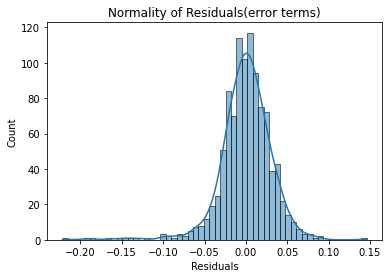

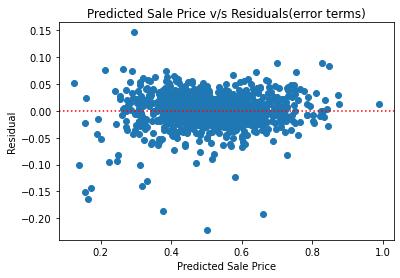

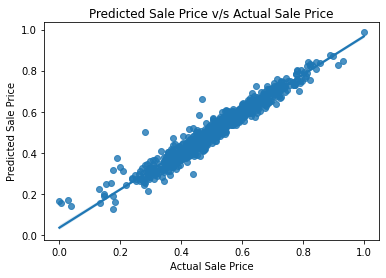

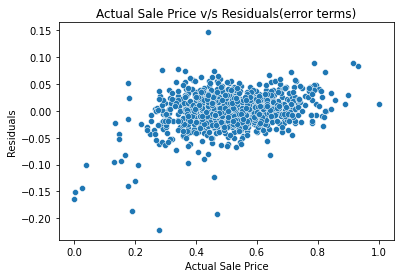

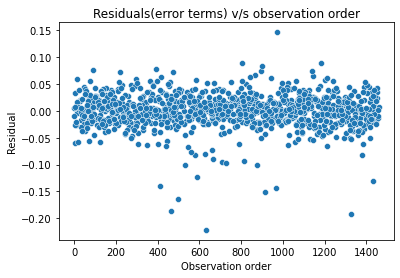

In [94]:
residuals_analysis(y_train, lasso_model.predict(X_train))

##### Evaluating Model

In [95]:
metrics_lasso = calculateMetrics(lasso_model,X_train,y_train,X_test,y_test)

R2 of train = 0.943994412716278
R2 of test = 0.9092244104989701
RSS of train = 0.9868182036949635
RSS of test = 0.6364195556049846
MSE of train = 0.0009684182568154696
MSE of test = 0.0014530126840296453


### 5. Model Evaluation and Conclusion

We have done all the models evaluation right after models along with Linear regression assumption analysis.

Here we will draw up the comparsion table to closely observe the change of metrics across these models.

In [96]:
lr_metrics = {'Metric': ['R2 (Train)','R2 (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metrics_lr
        }

lr_metrics_table = pd.DataFrame(lr_metrics)

lr_metrics_rfe25_1 = pd.Series(metrics_lr_rfe25_1, name = 'Linear Regression + RFE 25 features + Manual 1')
lr_metrics_rfe25_6 = pd.Series(metrics_lr_rfe25_6, name = 'Linear Regression + RFE 25 features + Manual 6')
lr_metrics_rfe25_11 = pd.Series(metrics_lr_rfe25_11, name = 'Linear Regression + RFE 25 features + Manual 11')
ridge_metrics_all = pd.Series(metrics_ridge, name = 'Ridge All features')
ridge_metrics_rfe100 = pd.Series(metrics_ridge_rfe100, name = 'Ridge + RFE 100 features')
lasso_metrics_all = pd.Series(metrics_lasso, name = 'Lasso Regression All features')



final_metrics = pd.concat([lr_metrics_table, lr_metrics_rfe25_1,lr_metrics_rfe25_6,lr_metrics_rfe25_11,ridge_metrics_all,ridge_metrics_rfe100,lasso_metrics_all], axis = 1)
final_metrics = final_metrics.set_index("Metric")
final_metrics.T

Metric,R2 (Train),R2 (Test),RSS (Train),RSS (Test),MSE (Train),MSE (Test)
Linear Regression,0.954978,0.885676,0.793290,0.801514,0.027902,0.042778
Linear Regression + RFE 25 features + Manual 1,0.916431,0.884325,1.472483,0.810984,0.038014,0.043030
Linear Regression + RFE 25 features + Manual 6,0.881855,0.849206,2.081714,1.057206,0.045198,0.049130
Linear Regression + RFE 25 features + Manual 11,0.870370,0.845376,2.284073,1.084052,0.047344,0.049749
Ridge All features,0.950965,0.905277,0.863999,0.664092,0.029119,0.038938
Ridge + RFE 100 features,0.941989,0.901967,1.022147,0.687299,0.031672,0.039613
Lasso Regression All features,0.943994,0.909224,0.986818,0.636420,0.031119,0.038118


#### Conclusion 

As we can observe ***Lasso*** has the most balanced R2 across test and train datasets and the value itself is quite good ensuring good predictive power while ensuring simpler model. As Lasso by making coefficients 0 basically perfomr sort of feature elimination also.

By observing:

In [97]:
print("\n\033[1mLasso Coefficients\033[0m")
print(pd.Series(np.absolute(lasso_model.coef_), index=X_train.columns.values).sort_values(ascending=False))


Lasso Coefficients
GrLivArea                0.296467
OverallQual              0.153800
LotArea                  0.132286
OverallCond              0.094162
TotalBsmtSF              0.091783
                           ...   
BldgType_2fmCon          0.000000
BldgType_Duplex          0.000000
BldgType_Twnhs           0.000000
BldgType_TwnhsE          0.000000
SaleCondition_Partial    0.000000
Length: 225, dtype: float64


The above listed coefficients are arranged in decreasing order after performing absolute operations as both positive and negative siginficance matters. 

Hence we can conclude that variables ***GrLivArea***, ***OverallQual***, ***LotArea***, ***OverallCond***, ***TotalBsmtSF*** are the most significant in predicting the price of house and are positively co-related i.e. the increase in their values will drive up the price.



In [98]:
X_train_top5 = X_train[['GrLivArea', 'OverallQual', 'LotArea', 'OverallCond', 'TotalBsmtSF']]
X_test_top5 = X_test[['GrLivArea', 'OverallQual', 'LotArea', 'OverallCond', 'TotalBsmtSF']]
lasso_top5 = buildLRModel(X_train_top5,y_train)
_ = calculateMetrics(lasso_top5,sm.add_constant(X_train_top5),y_train,sm.add_constant(X_test_top5),y_test)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     989.5
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        20:30:52   Log-Likelihood:                 1524.4
No. Observations:                1019   AIC:                            -3037.
Df Residuals:                    1013   BIC:                            -3007.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0041      0.011      0.361      

These variables explain ***83%*** varaince in the model and as visible above can give decent accuracy on test set/ unseen data. Hence they are quite significant.

### Questions and Answers (Also available in separate PDF)

***Question 1***

***What is the optimal value of alpha for ridge and lasso regression?***
  
***Answer 1***

In [99]:
print('Optimal value of alpha for ridge is {}'.format(grid_ridge.best_params_['alpha']))
print('Optimal value of alpha for lasso is {}'.format(grid_lasso.best_params_['alpha']))

Optimal value of alpha for ridge is 1.0
Optimal value of alpha for lasso is 0.0001


What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 

Before doubling alpha, the metrics are as following:

In [100]:
print("\033[1mRidge Metrics\033[0m")
_ = calculateMetrics(ridge_model,X_train,y_train,X_test,y_test)

print("\n\033[1mLasso Metrics\033[0m")
_ = calculateMetrics(lasso_model,X_train,y_train,X_test,y_test)

Ridge Metrics
R2 of train = 0.9509648397166721
R2 of test = 0.9052772986289798
RSS of train = 0.8639993103465328
RSS of test = 0.6640924046168206
MSE of train = 0.0008478894115275101
MSE of test = 0.0015161927046046133

Lasso Metrics
R2 of train = 0.943994412716278
R2 of test = 0.9092244104989701
RSS of train = 0.9868182036949635
RSS of test = 0.6364195556049846
MSE of train = 0.0009684182568154696
MSE of test = 0.0014530126840296453


The respective coffients are:

In [101]:
print("\033[1mRidge Coefficients\033[0m")
print(pd.Series(ridge_model.coef_, index=X_train.columns.values).sort_values(ascending=False))

print("\n\033[1mLasso Coefficients\033[0m")
print(pd.Series(lasso_model.coef_, index=X_train.columns.values).sort_values(ascending=False))

Ridge Coefficients
OverallQual             0.119924
LotArea                 0.118208
GrLivArea               0.114016
1stFlrSF                0.113760
OverallCond             0.090066
                          ...   
Heating_Grav           -0.037662
Functional_Sev         -0.037738
Neighborhood_MeadowV   -0.039602
Exterior1st_BrkComm    -0.041938
YearBuiltAge           -0.079280
Length: 225, dtype: float64

Lasso Coefficients
GrLivArea               0.296467
OverallQual             0.153800
LotArea                 0.132286
OverallCond             0.094162
TotalBsmtSF             0.091783
                          ...   
MSSubClass_30          -0.015699
Neighborhood_MeadowV   -0.016965
Exterior1st_Wd Sdng    -0.017860
Heating_Grav           -0.034406
YearBuiltAge           -0.079142
Length: 225, dtype: float64


After ***doubling alpha***, the metrics are as following:

In [102]:
ridge_model_d = Ridge(alpha=2*grid_ridge.best_params_['alpha'])
ridge_model_d.fit(X_train, y_train)
print("\033[1mRidge Metrics\033[0m")
_ = calculateMetrics(ridge_model_d,X_train,y_train,X_test,y_test)

lasso_model_d = Lasso(alpha=2*grid_lasso.best_params_['alpha'])
lasso_model_d.fit(X_train, y_train)
print("\n\033[1mLasso Metrics\033[0m")
_ = calculateMetrics(lasso_model_d,X_train,y_train,X_test,y_test)

Ridge Metrics
R2 of train = 0.9477616165424759
R2 of test = 0.9063328456144368
RSS of train = 0.9204400887063922
RSS of test = 0.6566920589170869
MSE of train = 0.0009032778103104928
MSE of test = 0.0014992969381668652

Lasso Metrics
R2 of train = 0.9368072103626016
R2 of test = 0.9129787556044949
RSS of train = 1.1134566778228585
RSS of test = 0.6100981771729697
MSE of train = 0.0010926954640067307
MSE of test = 0.001392918212723675


In [103]:
print("\033[1mRidge Coefficients\033[0m")
print(pd.Series(ridge_model_d.coef_, index=X_train.columns.values).sort_values(ascending=False))

print("\n\033[1mLasso Coefficients\033[0m")
print(pd.Series(lasso_model_d.coef_, index=X_train.columns.values).sort_values(ascending=False))

Ridge Coefficients
OverallQual             0.113023
1stFlrSF                0.103469
GrLivArea               0.102417
LotArea                 0.095801
OverallCond             0.079692
                          ...   
Exterior1st_BrkComm    -0.029269
Functional_Maj2        -0.030161
Heating_Grav           -0.032498
Neighborhood_MeadowV   -0.038345
YearBuiltAge           -0.062203
Length: 225, dtype: float64

Lasso Coefficients
GrLivArea              0.309101
OverallQual            0.159516
LotArea                0.112963
TotalBsmtSF            0.093961
OverallCond            0.085634
                         ...   
Neighborhood_IDOTRR   -0.008345
Heating_Grav          -0.008688
YearRemodAddAge       -0.015290
MSSubClass_30         -0.015508
YearBuiltAge          -0.064825
Length: 225, dtype: float64


***What will be the most important predictor variables after the change is implemented?***

+ Most important predictor variables after the change are:
    + Ridge: ***OverallQual***
    + Lasso: ***GrLivArea***

***Question 2***

***You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?***
  
***Answer 2***

+ ***Lasso*** Since it will have better explain-ability given it has put some coefficients are zero while still having R2 values approximately same, i.e. the prediction results will be same but Lasso will can do it with less variables hence it will be easier to explain same variables to business as oppose to Ridge which will have close to 200 variables with many having negligible coefficients

***Question 3***

***After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?***
  
***Answer 3***

Existing top 5 variables in Lasso are :

In [104]:
print(pd.Series(np.absolute(lasso_model_d.coef_), index=X_train.columns.values).sort_values(ascending=False)[:5])

GrLivArea      0.309101
OverallQual    0.159516
LotArea        0.112963
TotalBsmtSF    0.093961
OverallCond    0.085634
dtype: float64


In [105]:
cols_ex_top5 = X_train.columns.difference(pd.Series(lasso_model_d.coef_, index=X_train.columns.values).sort_values(ascending=False)[:5].index.tolist())
cols_ex_top5

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley_NA', 'Alley_Pave',
       'BedroomAbvGr', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'ScreenPorch',
       'Street_Pave', 'TotRmsAbvGrd', 'Utilities_NoSeWa', 'WoodDeckSF',
       'YearBuiltAge', 'YearRemodAddAge'],
      dtype='object', length=220)

In [106]:
X_train_ex_top5 = X_train[cols_ex_top5]
grid_lasso_ex_top5 = grid_model(Lasso(), X_train_ex_top5, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [107]:
lasso_model_ex_top5 = Lasso(alpha=grid_lasso_ex_top5.best_params_['alpha'])
lasso_model_ex_top5.fit(X_train_ex_top5, y_train)

print("\n\033[1mLasso Coefficients\033[0m")
print(pd.Series(lasso_model_ex_top5.coef_, index=X_train_ex_top5.columns.values).sort_values(ascending=False))


Lasso Coefficients
1stFlrSF                0.298168
2ndFlrSF                0.147612
MSZoning_FV             0.080716
BsmtFinSF1              0.070135
MSZoning_RL             0.066258
                          ...   
MSSubClass_30          -0.022038
YearRemodAddAge        -0.025754
Heating_Grav           -0.040961
YearBuiltAge           -0.043370
Neighborhood_MeadowV   -0.058593
Length: 220, dtype: float64


New top 5 variables in Lasso are :

In [108]:
print(pd.Series(np.absolute(lasso_model_ex_top5.coef_), index=X_train_ex_top5.columns.values).sort_values(ascending=False)[:5])

1stFlrSF       0.298168
2ndFlrSF       0.147612
MSZoning_FV    0.080716
BsmtFinSF1     0.070135
MSZoning_RL    0.066258
dtype: float64


***Question 4***  
  
***How can you make sure that a model is robust and generalisable?***

***Answer 4***
  
Simpler models tend to be more generalisable and robust, here simpler means the model having less number of features or lower degree relations or simpler coefficients in comparison to other models.  

Because of this explain-ability improves and the fact that there are features which have quite significant coefficients imply that general pattern of the equation is captured and change in inputs will cause too much variance unless inputs are way beyond the training bounds.    
  
  
There are various ways for ensuring a model is simpler, more robust and generalisable. We can use ***regularization*** techniques where the regularization term tries to penalize the model for coefficients count and higher values there by forcing the Cost function optimization to strike a balance between learning pattern and having sane coefficients values/count.

We can also achieve increase in robustness and generalisability by using some other measures. It depends on the type of the model used. For example, in case of regression, we can limit the number of features used while, in case of decision tree, we can limit the number of nodes, the number of levels etc.

Even data preparation also contribute to more robust models. Binning of continuous variables result in lesser variance.  Outliers can impact the robustness of the model therefore outliers have to be removed as they distort the model itself.

***What are the implications of the same for the accuracy of the model and why?***

The cost of simpler model is predictive power i.e. trade-off between bias and variance where it increases bias but with huge reduction in variance which translates into lower accuracy in train set in comparison but result in consistent accuracy across unseen data with good accuracy.